In [30]:
from model_utils import *
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import specgram
import soundfile as sf
import sys

In [88]:
project_dir = 'D:/Sistemas de Informação/TCC/'
data_dir = project_dir+'data/'
balanced_train = data_dir+'balanced_train/'
train_data = balanced_train+'audio/'

footstep_data = data_dir+'train/footstep_data'
other_data = data_dir+'train/other_data'

pitch_fot = data_dir+'train/pitch_fot/'
pitch_other = data_dir+'train/pitch_other/'

footstep_csv = project_dir+ 'segments/subset_unbalanced_train_segments.csv'
other_csv = project_dir+ 'segments/1600max_subset_unbalanced_train_segments.csv'

# hiperparâmetros para extração de características
frames = 420 # largura do mel spectogram 
bands = 60 # altura

In [91]:
# EXEMPLO
def _extract_segments(clip):
    melspec = librosa.feature.melspectrogram(clip, sr=22050, n_fft=1024, hop_length=512, n_mels=bands)
    logspec = librosa.amplitude_to_db(melspec)    
    return np.array(logspec)

sample_filename = footstep_data+"/2_0A9_26DKhXw.wav"
footstep_clip,s = librosa.load(sample_filename)
features = _extract_segments(footstep_clip)
features.shape

(60, 431)

In [8]:
import IPython.display as ipd
ipd.Audio(sample_filename)

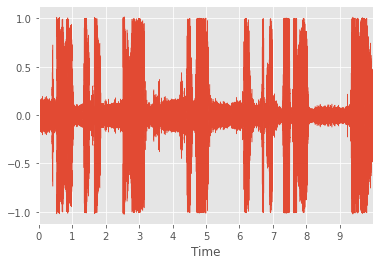

In [92]:
#waveplot

import librosa.display

y, sr = librosa.load(sample_filename)
# trim silent edges
footstep_clip, _ = librosa.effects.trim(y)
librosa.display.waveplot(footstep_clip, sr=sr);

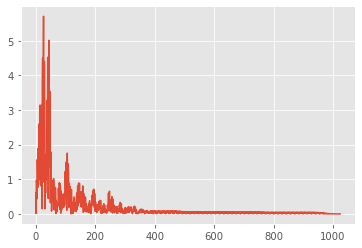

In [7]:
# Appliying Short Time Fourier Transform

n_fft = 2048
D = np.abs(librosa.stft(footstep_clip[:n_fft], n_fft=n_fft, hop_length=n_fft+1))
plt.plot(D);

In [11]:
def manipulate(data, sampling_rate, pitch_factor):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [93]:
pf = 2
new_pitch = manipulate(y, sr, pf)

sf.write('pitchtest.wav', new_pitch, sr, subtype='PCM_24')

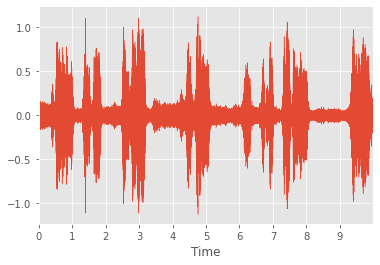

In [94]:
foot_pitch, _ = librosa.effects.trim(new_pitch)
librosa.display.waveplot(foot_pitch, sr=sr);

In [18]:
sf.write('pitchtest.wav', new_pitch, sr, subtype='PCM_24')

In [20]:
ipd.Audio('pitchtest.wav')

In [95]:
pf = -2
new_pitch2 = manipulate(y, sr, pf)

sf.write('pitchtest2.wav', new_pitch2, sr, subtype='PCM_24')

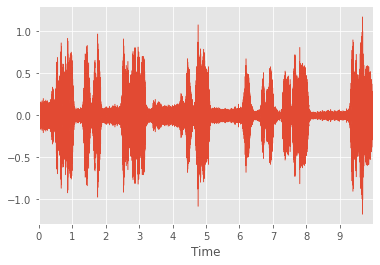

In [96]:
foot_pitch2, _ = librosa.effects.trim(new_pitch2)
librosa.display.waveplot(foot_pitch2, sr=sr);

D:\Anaconda\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
D:\Anaconda\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


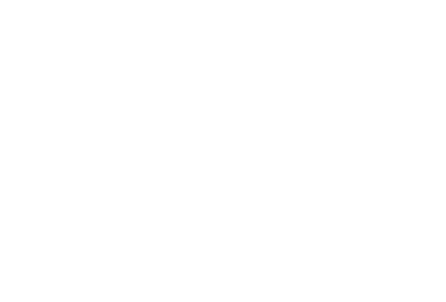

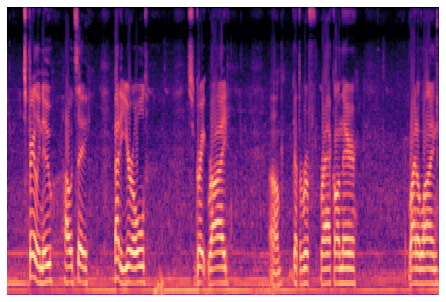

In [97]:
n_fft = 2048
hop_length = 512
n_mels = 128

import pylab

pylab.axis('off') # no axis
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge

# Plotting Mel Spectogram

n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

mel_spec_all = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
logmel_spec_all = librosa.power_to_db(mel_spec_all, ref=np.max)

# Make a new figure
fig = plt.figure()
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

librosa.display.specshow(logmel_spec_all, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
#plt.xlabel("Time")
#plt.ylabel("Mel")
#plt.colorbar(format='%+2.0f dB');
plt.show()

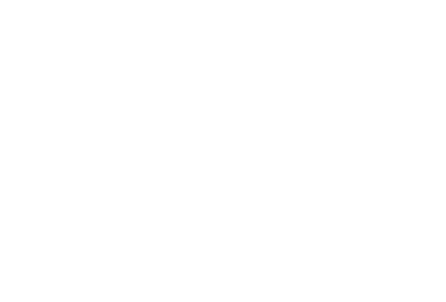

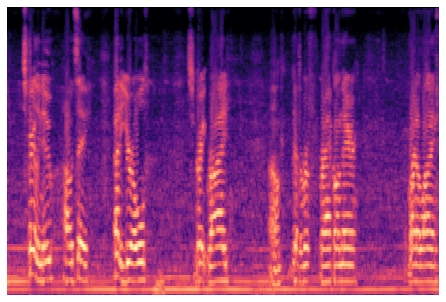

In [98]:
n_fft = 2048
hop_length = 512
n_mels = 128

import pylab

pylab.axis('off') # no axis
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge

# Plotting Mel Spectogram

n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

mel_spec_all = librosa.feature.melspectrogram(foot_pitch, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
logmel_spec_all = librosa.power_to_db(mel_spec_all, ref=np.max)

# Make a new figure
fig = plt.figure()
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

librosa.display.specshow(logmel_spec_all, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
#plt.xlabel("Time")
#plt.ylabel("Mel")
#plt.colorbar(format='%+2.0f dB');
plt.show()

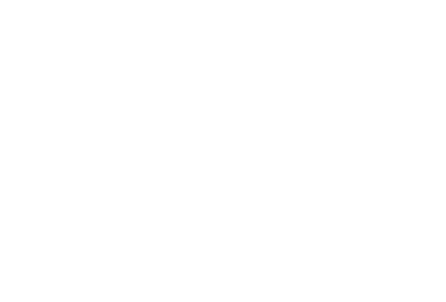

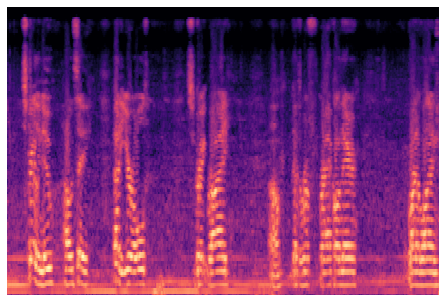

In [99]:
n_fft = 2048
hop_length = 512
n_mels = 128

import pylab

pylab.axis('off') # no axis
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge

# Plotting Mel Spectogram

n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

mel_spec_all = librosa.feature.melspectrogram(foot_pitch2, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
logmel_spec_all = librosa.power_to_db(mel_spec_all, ref=np.max)

# Make a new figure
fig = plt.figure()
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

librosa.display.specshow(logmel_spec_all, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
#plt.xlabel("Time")
#plt.ylabel("Mel")
#plt.colorbar(format='%+2.0f dB');
plt.show()

In [39]:
pf1 = 2
pf2 = -2
count = 0
for fn in natural_sort(glob.glob(os.path.join(data_dir, footstep_data, "*.wav"))):
    y, sr = librosa.load(fn)
    new_pitch1 = manipulate(y, sr, pf1)
    new_pitch2 = manipulate(y, sr, pf2)
    prefix = os.path.basename(str(count)+'_')
    sf.write(pitch_fot+'pitchfot1.wav', new_pitch, sr, subtype='PCM_24')
    
    os.rename(os.path.join(pitch_fot, fn), os.path.join(pitch_fot, "{}_{}".format(prefix, fn.split(pitch_fot)[1].split('\\')[1])))
    count +=1
    
    sf.write(pitch_fot+'pitchfot2.wav', new_pitch2, sr, subtype='PCM_24')
    os.rename(os.path.join(pitch_fot, fn), os.path.join(pitch_fot, "{}_{}".format(prefix, fn.split(pitch_fot)[1].split('\\')[1])))
    count +=1


IndexError: list index out of range

In [44]:
librosa.feature.melspectrogram(new_pitch, sr=22050, n_fft=1024, hop_length=512, n_mels = bands)

array([[6.39176140e+01, 1.68934460e+01, 8.68085251e+01, ...,
        1.20090570e+01, 8.94573784e+00, 1.62425308e+01],
       [2.10152416e+01, 9.49501038e+01, 8.20682755e+01, ...,
        3.48338051e+01, 3.37731514e+01, 7.70804062e+01],
       [5.69101753e+01, 9.28173676e+01, 5.61698074e+01, ...,
        5.51430273e+00, 1.16906252e+01, 2.22848682e+01],
       ...,
       [8.39505992e-06, 1.03875397e-09, 9.32925737e-10, ...,
        5.59828059e-08, 2.55781038e-06, 1.42747185e-05],
       [6.59898569e-06, 1.14190280e-11, 3.67614056e-12, ...,
        4.64059152e-10, 2.79147283e-08, 8.07232209e-06],
       [3.87248429e-06, 6.77832831e-14, 6.51517482e-14, ...,
        1.73635520e-14, 2.21219442e-14, 7.83000360e-06]], dtype=float32)

In [46]:
count = 0
footstep = 1
footstep_labels = []
for fn in natural_sort(glob.glob(os.path.join(data_dir, footstep_data, "*.wav"))):
        # Need to get the labels for each clip from the CSV file
        #prefix = os.path.basename(str(count))
        #os.rename(os.path.join(footstep_data, fn), os.path.join(footstep_data, "{}_{}".format(prefix, fn.split(footstep_data)[1].split('\\')[1])))
        #count +=1
        footstep_labels.append(footstep)

In [57]:
count = 1243
other = 0
other_labels = []
for fn in natural_sort(glob.glob(os.path.join(data_dir, other_data, "*.wav"))):
        # Need to get the labels for each clip from the CSV file
        #prefix = os.path.basename(str(count))
        #os.rename(os.path.join(other_data, fn), os.path.join(other_data, "{}_{}".format(prefix, fn.split(other_data)[1].split('\\')[1])))
        #count +=1
        other_labels.append(other)

In [48]:
frames = 420 # largura do mel spectogram 
bands = 60 # altura

f = 0
o = 1243

In [55]:
def extract_features(labels,ln,parent_dir,sub_dir,csv_file,file_ext="*.wav",bands = 60,frames = 420):
    log_specgrams = np.empty((0, bands,frames))
    file_labels = labels
    count = ln
    for fn in natural_sort(glob.glob(os.path.join(parent_dir, sub_dir, file_ext))):
        sound_clip, s = librosa.load(fn)
        new_pitch1 = manipulate(sound_clip, s, pf1)
        print('Processing Line #' + str(count))
        print('features for ' + fn + ' extracted.') 
        signal = sound_clip
        melspec = librosa.feature.melspectrogram(new_pitch1, sr=22050, n_fft=1024, hop_length=512, n_mels = bands)
        logspec = librosa.power_to_db(melspec)
        #log_specgrams.append(logspec)
        logspec = librosa.util.fix_length(logspec, frames)
        log_specgrams = np.append(log_specgrams, [logspec], axis=0) 
        #prefix = str(row)+'_'
        # Need to get the labels for each clip from the CSV file
        #file = fn.split(sub_dir)[1].split('\\')[1].split('_')[0]
        #os.rename(os.path.join(sub_dir, fn), os.path.join(sub_dir, "{}_{}".format(prefix, fn)))
        
        rownum = fn.split(sub_dir)[1].split('\\')[1].split('_')[0]
        print('rownum = ' + str(rownum))
        #continue
        #labels = (get_file_name_labels_from_audioset_csv(rownum,csv_file,audioset_indices_csv))
        
        #print('Labels = '+str(labels))
        #file_labels.append(labels)
        
        
        count += 1
        
    log_specgrams = np.array(log_specgrams)
    
    return np.array(log_specgrams), np.array(file_labels)


In [51]:
features_fp1, labels_fp1 = extract_features(footstep_labels,f,data_dir,footstep_data,footstep_csv,"*.wav",bands,frames)
save_dir = data_dir+"train/pitch_fot"+"/features/"
assure_path_exists(save_dir)
save_files(save_dir,features_fp1,labels_fp1)

ures for /Sistemas de Informação/TCC/data/train/footstep_data\1095_V2nXBTDxlFE.wav extracted.
rownum = 1095
Processing Line #1096
features for /Sistemas de Informação/TCC/data/train/footstep_data\1096_V3KhpqgCCXQ.wav extracted.
rownum = 1096
Processing Line #1097
features for /Sistemas de Informação/TCC/data/train/footstep_data\1097_V4d66L-uwds.wav extracted.
rownum = 1097
Processing Line #1098
features for /Sistemas de Informação/TCC/data/train/footstep_data\1098_V7yS-Yxilhk.wav extracted.
rownum = 1098
Processing Line #1099
features for /Sistemas de Informação/TCC/data/train/footstep_data\1099_v13GG-cZBgk.wav extracted.
rownum = 1099
Processing Line #1100
features for /Sistemas de Informação/TCC/data/train/footstep_data\1100_v45_d8OLRpE.wav extracted.
rownum = 1100
Processing Line #1101
features for /Sistemas de Informação/TCC/data/train/footstep_data\1101_Vb2HgSnfpvs.wav extracted.
rownum = 1101
Processing Line #1102
features for /Sistemas de Informação/TCC/data/train/footstep_data\

In [56]:
def extract_features1(labels,ln,parent_dir,sub_dir,csv_file,file_ext="*.wav",bands = 60,frames = 420):
    log_specgrams = np.empty((0, bands,frames))
    file_labels = labels
    count = ln
    for fn in natural_sort(glob.glob(os.path.join(parent_dir, sub_dir, file_ext))):
        sound_clip, s = librosa.load(fn)
        new_pitch2 = manipulate(sound_clip, s, pf2)
        print('Processing Line #' + str(count))
        print('features for ' + fn + ' extracted.') 
        signal = sound_clip
        melspec = librosa.feature.melspectrogram(new_pitch1, sr=22050, n_fft=1024, hop_length=512, n_mels = bands)
        logspec = librosa.power_to_db(melspec)
        #log_specgrams.append(logspec)
        logspec = librosa.util.fix_length(logspec, frames)
        log_specgrams = np.append(log_specgrams, [logspec], axis=0) 
        #prefix = str(row)+'_'
        # Need to get the labels for each clip from the CSV file
        #file = fn.split(sub_dir)[1].split('\\')[1].split('_')[0]
        #os.rename(os.path.join(sub_dir, fn), os.path.join(sub_dir, "{}_{}".format(prefix, fn)))
        
        rownum = fn.split(sub_dir)[1].split('\\')[1].split('_')[0]
        print('rownum = ' + str(rownum))
        #continue
        #labels = (get_file_name_labels_from_audioset_csv(rownum,csv_file,audioset_indices_csv))
        
        #print('Labels = '+str(labels))
        #file_labels.append(labels)
        
        
        count += 1
        
    log_specgrams = np.array(log_specgrams)
    
    return np.array(log_specgrams), np.array(file_labels)

In [54]:
features_fp2, labels_fp2 = extract_features(footstep_labels,f,data_dir,footstep_data,footstep_csv,"*.wav",bands,frames)
save_dir = data_dir+"train/pitch_fot"+"/features1/"
assure_path_exists(save_dir)
save_files(save_dir,features_fp2,labels_fp2)

es for /Sistemas de Informação/TCC/data/train/footstep_data\1095_V2nXBTDxlFE.wav extracted.
rownum = 1095
Processing Line #1096
features for /Sistemas de Informação/TCC/data/train/footstep_data\1096_V3KhpqgCCXQ.wav extracted.
rownum = 1096
Processing Line #1097
features for /Sistemas de Informação/TCC/data/train/footstep_data\1097_V4d66L-uwds.wav extracted.
rownum = 1097
Processing Line #1098
features for /Sistemas de Informação/TCC/data/train/footstep_data\1098_V7yS-Yxilhk.wav extracted.
rownum = 1098
Processing Line #1099
features for /Sistemas de Informação/TCC/data/train/footstep_data\1099_v13GG-cZBgk.wav extracted.
rownum = 1099
Processing Line #1100
features for /Sistemas de Informação/TCC/data/train/footstep_data\1100_v45_d8OLRpE.wav extracted.
rownum = 1100
Processing Line #1101
features for /Sistemas de Informação/TCC/data/train/footstep_data\1101_Vb2HgSnfpvs.wav extracted.
rownum = 1101
Processing Line #1102
features for /Sistemas de Informação/TCC/data/train/footstep_data\11

In [59]:
features_op1, labels_op1 = extract_features(other_labels,o,data_dir,other_data,other_csv,"*.wav",bands,frames)
save_dir = data_dir+"train/pitch_other"+"/features/"
assure_path_exists(save_dir)
save_files(save_dir,features_op1,labels_op1)

acted.
rownum = 2260
Processing Line #2261
features for /Sistemas de Informação/TCC/data/train/other_data\2261_vwdFUtLKZzU.wav extracted.
rownum = 2261
Processing Line #2262
features for /Sistemas de Informação/TCC/data/train/other_data\2262_vwe0wLJpgYU.wav extracted.
rownum = 2262
Processing Line #2263
features for /Sistemas de Informação/TCC/data/train/other_data\2263_vWQnKucgZM8.wav extracted.
rownum = 2263
Processing Line #2264
features for /Sistemas de Informação/TCC/data/train/other_data\2264_vYEsMek-WQc.wav extracted.
rownum = 2264
Processing Line #2265
features for /Sistemas de Informação/TCC/data/train/other_data\2265_W6Jue6r7hJY.wav extracted.
rownum = 2265
Processing Line #2266
features for /Sistemas de Informação/TCC/data/train/other_data\2266_W7Y4lBwYAtE.wav extracted.
rownum = 2266
Processing Line #2267
features for /Sistemas de Informação/TCC/data/train/other_data\2267_W9j_UdAoP7U.wav extracted.
rownum = 2267
Processing Line #2268
features for /Sistemas de Informação/TCC

In [60]:
features_op2, labels_op2 = extract_features1(other_labels,o,data_dir,other_data,other_csv,"*.wav",bands,frames)
save_dir = data_dir+"train/pitch_other"+"/features1/"
assure_path_exists(save_dir)
save_files(save_dir,features_op2,labels_op2)

ted.
rownum = 2260
Processing Line #2261
features for /Sistemas de Informação/TCC/data/train/other_data\2261_vwdFUtLKZzU.wav extracted.
rownum = 2261
Processing Line #2262
features for /Sistemas de Informação/TCC/data/train/other_data\2262_vwe0wLJpgYU.wav extracted.
rownum = 2262
Processing Line #2263
features for /Sistemas de Informação/TCC/data/train/other_data\2263_vWQnKucgZM8.wav extracted.
rownum = 2263
Processing Line #2264
features for /Sistemas de Informação/TCC/data/train/other_data\2264_vYEsMek-WQc.wav extracted.
rownum = 2264
Processing Line #2265
features for /Sistemas de Informação/TCC/data/train/other_data\2265_W6Jue6r7hJY.wav extracted.
rownum = 2265
Processing Line #2266
features for /Sistemas de Informação/TCC/data/train/other_data\2266_W7Y4lBwYAtE.wav extracted.
rownum = 2266
Processing Line #2267
features for /Sistemas de Informação/TCC/data/train/other_data\2267_W9j_UdAoP7U.wav extracted.
rownum = 2267
Processing Line #2268
features for /Sistemas de Informação/TCC/d